<img src="./images/QISKit-c.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="250 px" align="left">

## _*Multi-qubit states *_ 

The latest version of this notebook is available on https://github.com/IBM/qiskit-sdk-py/tree/master/scripts.

For more information about how to use the Quantum Experience consult the [Quantum Experience tutorials](https://quantumexperience.ng.bluemix.net/qstage/#/tutorial?sectionId=c59b3710b928891a1420190148a72cce&pageIndex=0) or check-out the [community](https://quantumexperience.ng.bluemix.net/qstage/#/community).

***
### Contributors
Jay Gambetta

## Introduction
Many people tend to think quantum physics is hard math. This is actually not true, quantum concepts are very similar to linear algebra classes you probably did in first year university or even at high school. What is hard about quantum physics is that there is no simple underlying theory. Instead, you need to accept counter-intuitive ideas. In putting together the Quantum Experience, we feel that you can get far by understanding two principles. 
1. A physical system in a perfectly definite state can still behave randomly.
2. Two systems that are too far apart to influence each other can nevertheless behave in ways that, though individually random, are somehow strongly correlated.

In [1]:
import sys
if sys.version_info < (3,0):
    raise Exception("Please use Python version 3 or greater.")
    
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.linalg
%matplotlib inline
import time
from IBMQuantumExperience import IBMQuantumExperience
from qhelpers.basicplotter import plot_histogram
from qhelpers.basicplotter import plot_qsphere
from qhelpers.misc import get_data
from qhelpers.misc import combine_jobs
from qhelpers.misc import average_data

import Qconfig
api = IBMQuantumExperience.IBMQuantumExperience(Qconfig.APItoken, Qconfig.config)

In [ ]:
programSuperposition = """
OPENQASM 2.0;
include "qelib1.inc";
qreg q[7];
creg c[7];
h q;
measure q -> c;
"""

qasms = [{'qasm' : programSuperposition}]
device = 'simulator'
shots = 1024
out = api.run_job(qasms,device,shots,max_credits=3)
jobids=[out['id']]
results=combine_jobs(jobids, api, wait=20, timeout=240)
data=get_data(results,0)
plot_histogram(data)

In [ ]:
plot_histogram(data,5)

In [ ]:
plot_histogram(data,2)

In [ ]:
plot_qsphere(data,7)

In [ ]:
data_test ={'0': 100, '1': 0}
plot_qsphere(data_test,1)
data_test ={'0': 1, '1': 100}
plot_qsphere(data_test,1)
data_test ={'0': 50, '1': 50}
plot_qsphere(data_test,1)

In [ ]:
data_test ={'00': 100, '01': 0, '10': 0, '11': 100}
plot_qsphere(data_test,2)
data_test ={'00': 0, '01': 100, '10': 100, '11': 0}
plot_qsphere(data_test,2)

In [ ]:
data_test ={'000': 100, '001': 0, '010': 0, '011': 0, '100': 0, '101': 0, '110': 0, '111': 100, }
plot_qsphere(data_test,3)
data_test ={'000': 0, '001': 100, '010': 0, '011': 0, '100': 0, '101': 0, '110': 100, '111': 0, }
plot_qsphere(data_test,3)

001  0
[0.94280904158206336, 0.0, 0.33333333333333337]
011  0
[0.94280904158206336, 0.0, -0.33333333333333326]
000  0
[0.0, 0.0, 1.0]
100  2.0
[-0.47140452079103212, -0.81649658092772581, 0.33333333333333337]
110  2.0
[-0.47140452079103212, -0.81649658092772581, -0.33333333333333326]
101  1
[-0.47140452079103146, 0.81649658092772615, -0.33333333333333326]
111  0
[0.0, 0.0, -1.0]
010  1
[-0.47140452079103146, 0.81649658092772615, 0.33333333333333337]


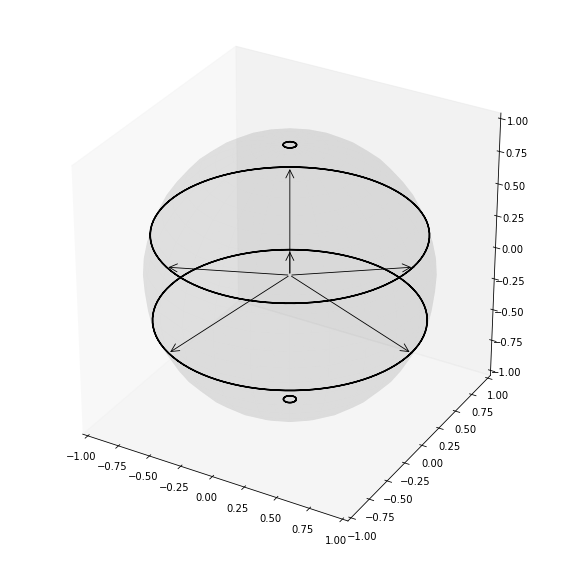

In [2]:
data_test ={'000': 0, '001': 100, '010': 100, '011': 100, '100': 100, '101': 100, '110': 100, '111': 0, }
plot_qsphere(data_test,3)

In [ ]:
data_test ={'000': 0, '001': 100, '010': 100, '011': 0, '100': 100, '101': 0, '110': 0, '111': 0, }
plot_qsphere(data_test,3)
data_test ={'000': 0, '001': 0, '010': 0, '011': 100, '100': 0, '101': 100, '110': 100, '111': 0, }
plot_qsphere(data_test,3)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
import scipy.special
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

In [ ]:
"""
Index combinations for plotting on the qsphere.

See:
lex_index: https://msdn.microsoft.com/en-us/library/aa289166%28v=vs.71%29.aspx
n_choose_k: http://stackoverflow.com/questions/
              2096573/counting-combinations-and-permutations-efficiently
"""
from functools import reduce

def compliment(value):
    return ''.join(COMPLEMENT[x] for x in value)

COMPLEMENT = {'1': '0', '0': '1'}

def n_choose_k(n, k):
    """TODO."""
    if n == 0:
        return 0.0
    else:
        return reduce(lambda x, y: x * y[0] / y[1], zip(range(n - k + 1, n+1),
                                                        range(1, k+1)), 1)


def lex_index(n, k, lst):
    """TODO."""
    assert len(lst) == k, "list should have length k"
    comb = list(map(lambda x: n-1-x, lst))
    dualm = sum([n_choose_k(comb[k-1-i], i+1) for i in range(k)])
    m = n_choose_k(n, k) - 1 - dualm
    return int(m)


def bit_string_index(s):
    """TODO."""
    n = len(s)
    k = s.count("1")
    assert s.count("0") == n - k, "s must be a string of 0 and 1"
    ones = [pos for pos, char in enumerate(s) if char == "1"]
    return lex_index(n, k, ones)


if __name__ == "__main__":

    slist = ["1100", "1010", "1001", "0110", "0101", "0011"]
    indices = list(map(bit_string_index, slist))
    print("string list = %s" % slist)
    print("indices     = %s" % indices)



In [ ]:
def qspherelocation(data):
    for key in data:
        print(key)
        d=len(key)
        weight = key.count("1")
        zvalue = -2*weight/d+1
        numberofdivisions=scipy.special.binom(d,weight)
    
        numberinweightorder = bit_string_index(key)
        if numberinweightorder <= numberofdivisions/2:
            comkey=compliment(key)
            numberinweightordert=bit_string_index(comkey)
            numberinweightorder=numberofdivisions/2+numberinweightordert
        angle = (numberinweightorder-1)*2*np.pi/numberofdivisions
        xvalue = np.sqrt(1-zvalue**2)*np.cos(angle)
        yvalue = np.sqrt(1-zvalue**2)*np.sin(angle)
        #print(zvalue**2+xvalue**2+yvalue**2)
        print([xvalue,yvalue,zvalue])
        #linewidth=5*data.get(key)/sum(data.values())
    

In [ ]:
tdata =  ['00','11','10','01']
qspherelocation(tdata)
tdata =  ['000','111','010','101']
qspherelocation(tdata)

In [ ]:
def plot_qsphere(data,numberofqubits):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.axes.set_xlim3d(-1.0, 1.0)
    ax.axes.set_ylim3d(-1.0, 1.0)
    ax.axes.set_zlim3d(-1.0, 1.0)
    ax.set_aspect("equal")
    ax.axes.grid(False)
    # Plot semi-transparent sphere
    u = np.linspace(0, 2*np.pi, 25)
    v = np.linspace(0, np.pi, 25)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x, y, z,  rstride=1, cstride=1, color='k', alpha=0.05, linewidth=0)
    # wireframe
    # Get rid of the panes                          
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0)) 
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0)) 
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0)) 

    # Get rid of the spines                         
    ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0)) 
    ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0)) 
    ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    # Get rid of the ticks                          
    ax.set_xticks([])                               
    ax.set_yticks([])                               
    ax.set_zticks([])
    d=numberofqubits
    for key in data:
        weight = key.count("1")
        zvalue = -2*weight/d+1
        numberofdivisions=scipy.special.binom(d,weight)
    
        numberinweightorder = bit_string_index(key)
        if numberinweightorder <= numberofdivisions/2:
            comkey=compliment(key)
            numberinweightordert=bit_string_index(comkey)
            numberinweightorder=numberofdivisions/2+numberinweightordert
        angle = (numberinweightorder-1)*2*np.pi/numberofdivisions
        xvalue = np.sqrt(1-zvalue**2)*np.cos(angle)
        yvalue = np.sqrt(1-zvalue**2)*np.sin(angle)
    
        a = Arrow3D([0, xvalue], [0, yvalue], [0, zvalue], mutation_scale=20, lw=2, arrowstyle="->", color="k")
        ax.add_artist(a)
    for weight in range(d+1):
        theta = np.linspace(-2 * np.pi, 2 * np.pi, 100)
        z = -2*weight/d+1
        r = np.sqrt(1-z**2)
        x = r * np.cos(theta)
        y = r * np.sin(theta)
        ax.plot(x, y, z,'k')
    plt.show()

In [ ]:
plot_qsphere(data,5)

In [ ]:
datat ={'00011':100, '11100': 100}
plot_qsphere(datat,5)
datat ={'00111':100, '11000': 100}
plot_qsphere(datat,5)

In [ ]:
def qspherelocation(data):
    for key in data:
        print(key)
        d=len(key)
        weight = key.count("1")
        zvalue = -2*weight/d+1
        numberofdivisions=scipy.special.binom(d,weight)
    
        numberinweightorder = bit_string_index(key)
        if numberinweightorder <= numberofdivisions/2:
            comkey=compliment(key)
            numberinweightordert=bit_string_index(comkey)
            numberinweightorder=numberofdivisions/2+numberinweightordert
        angle = (numberinweightorder-1)*2*np.pi/numberofdivisions
        xvalue = np.sqrt(1-zvalue**2)*np.cos(angle)
        yvalue = np.sqrt(1-zvalue**2)*np.sin(angle)
        #print(zvalue**2+xvalue**2+yvalue**2)
        print([xvalue,yvalue,zvalue])
        #linewidth=5*data.get(key)/sum(data.values())
    

In [ ]:
test = "10101"
test = compliment(test)
print(test)

In [ ]:
"""
Index combinations for plotting on the qsphere.

See:
lex_index: https://msdn.microsoft.com/en-us/library/aa289166%28v=vs.71%29.aspx
n_choose_k: http://stackoverflow.com/questions/
              2096573/counting-combinations-and-permutations-efficiently
"""
from functools import reduce

def compliment(value):
    return ''.join(COMPLEMENT[x] for x in value)

COMPLEMENT = {'1': '0', '0': '1'}

def n_choose_k(n, k):
    """TODO."""
    if n == 0:
        return 0.0
    else:
        return reduce(lambda x, y: x * y[0] / y[1], zip(range(n - k + 1, n+1),
                                                        range(1, k+1)), 1)


def lex_index(n, k, lst):
    """TODO."""
    assert len(lst) == k, "list should have length k"
    comb = list(map(lambda x: n-1-x, lst))
    dualm = sum([n_choose_k(comb[k-1-i], i+1) for i in range(k)])
    m = 0*n_choose_k(n, k)  + dualm
    return int(m)


def bit_string_index(s):
    """TODO."""
    n = len(s)
    k = s.count("1")
    assert s.count("0") == n - k, "s must be a string of 0 and 1"
    ones = [pos for pos, char in enumerate(s) if char == "1"]
    return lex_index(n, k, ones)


if __name__ == "__main__":

    slist = ["1100", "1010", "1001", "0110", "0101", "0011"]
    indices = list(map(bit_string_index, slist))
    print("string list = %s" % slist)
    print("indices     = %s" % indices)


In [ ]:
bit_string_index("000000011111100000000001")